In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib .pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [120]:
data.shape

(21, 2)

In [121]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [122]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


**EDA and Data** **Visualization**

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Sorting Time', ylabel='Density'>

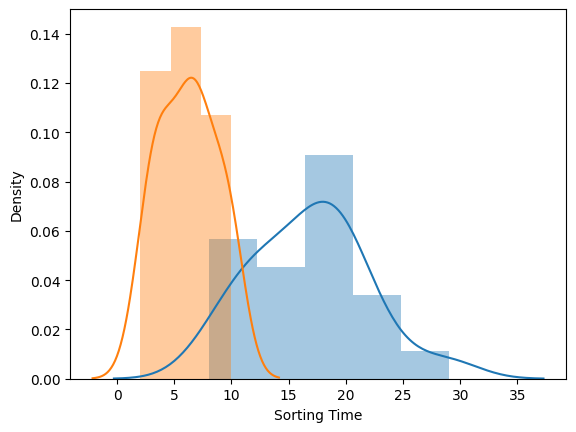

In [124]:
sns.distplot(data['Delivery Time'])
sns.distplot(data['Sorting Time'])

**Correlation**

In [125]:
data.corr()


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


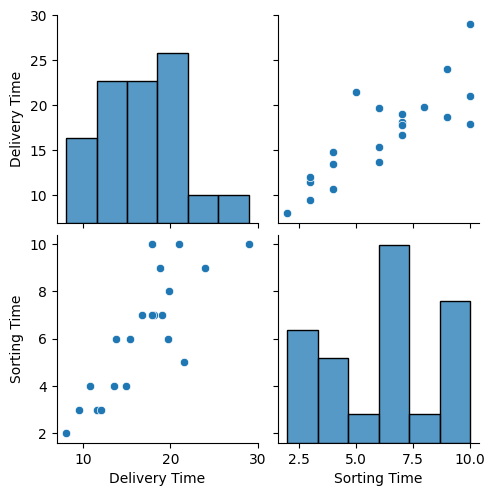

In [126]:
sns.pairplot(data)

In [127]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

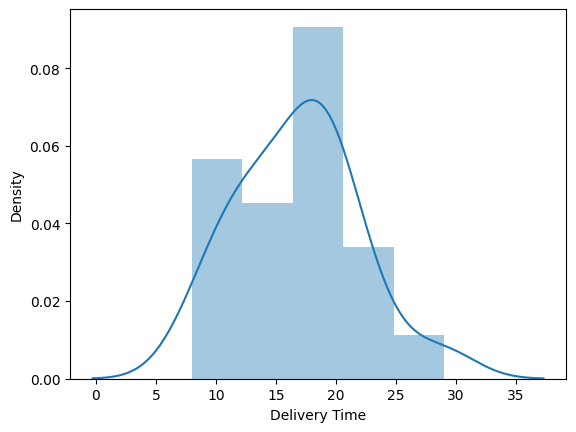

In [128]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

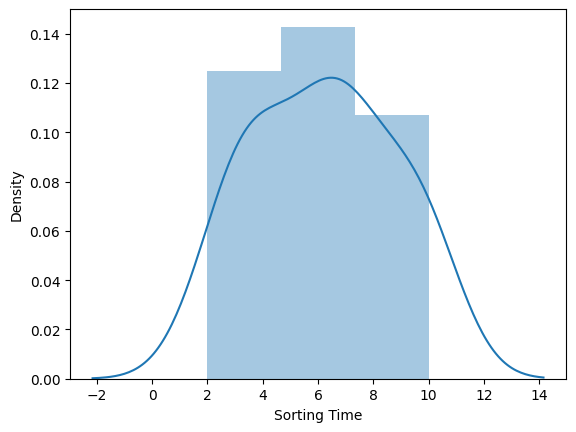

In [129]:
sns.distplot(data['Sorting Time'])

In [130]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

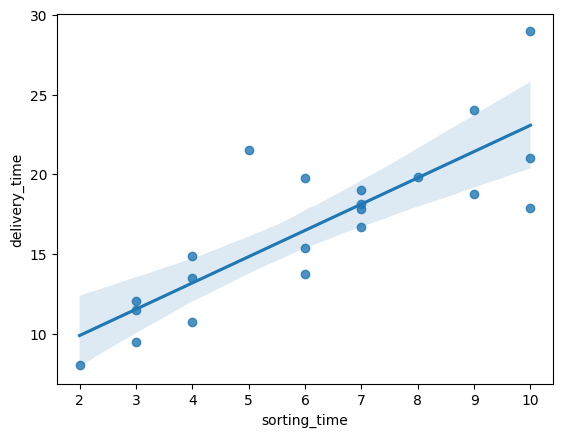

In [131]:
sns.regplot(x="sorting_time", y="delivery_time", data=data)


In [132]:
#model building
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

**Fitting a Linear Regression Model**

In [133]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [134]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [135]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

**Predict new data**

In [136]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,250,350])
newdata

0    200
1    250
2    350
dtype: int64

In [137]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,200
1,250
2,350


In [138]:
model.predict(data_pred)

0    336.386713
1    418.837708
2    583.739698
dtype: float64

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        13:59:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

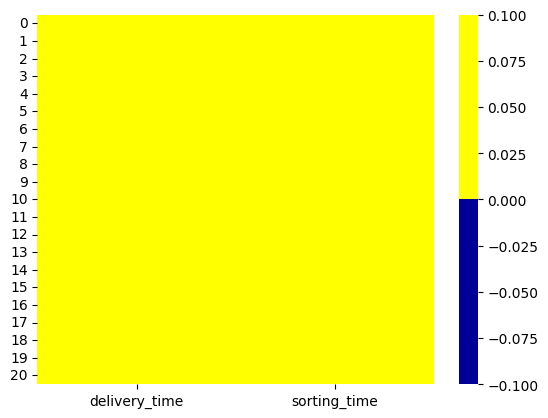

In [140]:
#to genrate heat map
import seaborn as sns
cols = data.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(data[cols].isnull(),
               cmap= sns.color_palette(colors))


{'whiskers': [<matplotlib.lines.Line2D at 0x7dcb8c8a13c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dcb8c8a1900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dcb8c8a1120>],
 'medians': [<matplotlib.lines.Line2D at 0x7dcb8d12b400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dcb8c8a1ab0>],
 'means': []}

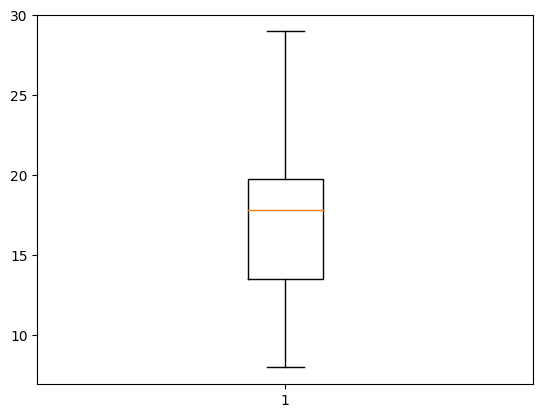

In [141]:

#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(data['delivery_time'])

<Axes: xlabel='delivery_time', ylabel='Density'>

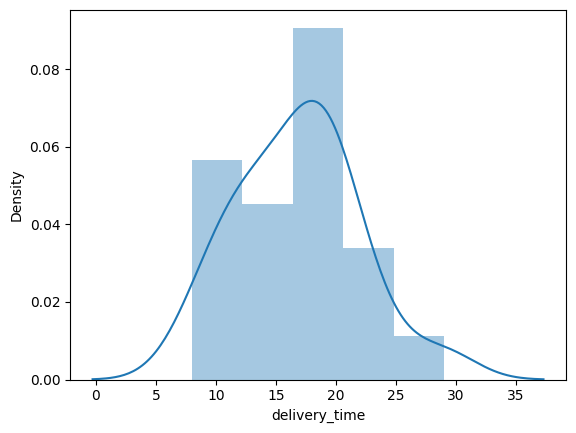

In [142]:
import seaborn as sns
sns.distplot(data.delivery_time)

In [143]:

#to check for duplicate rows
data[data.duplicated()].shape

(0, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7dcb8c8cff70>,
 'caps': [<matplotlib.lines.Line2D at 0x7dcb8c771750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dcb8c915030>],
 'medians': [<matplotlib.lines.Line2D at 0x7dcb8c7732e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dcb8c773580>],
 'means': []}

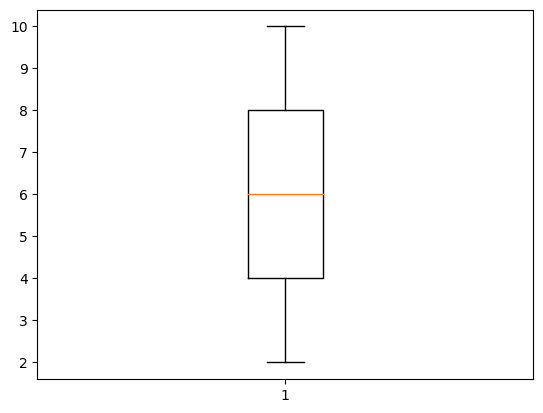

In [144]:

plt.boxplot(data['sorting_time'])

<Axes: xlabel='sorting_time', ylabel='Density'>

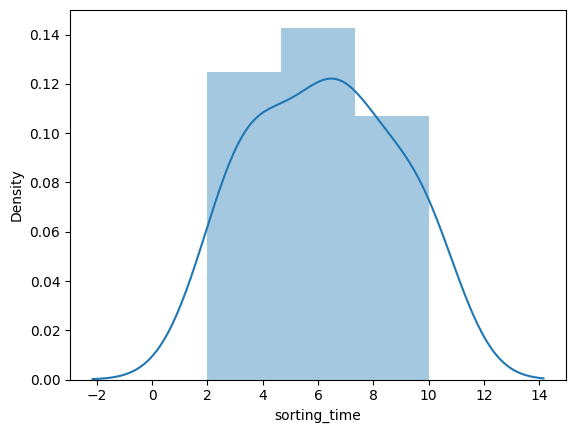

In [145]:
sns.distplot(data.sorting_time)

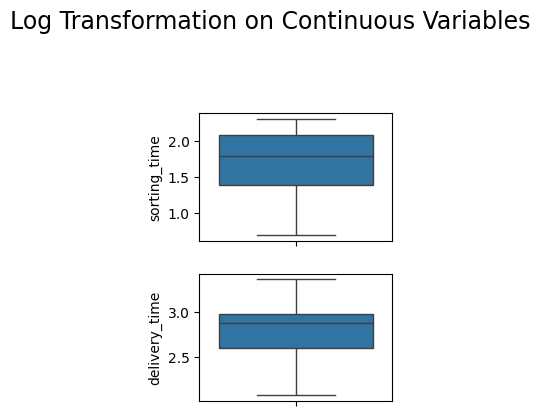

In [146]:
import numpy as np
fig, ax=plt.subplots(2, figsize=(3,4), sharex= False, sharey = False)
sns.boxplot(np.log(data.sorting_time), ax=ax[0])
sns.boxplot(np.log(data.delivery_time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

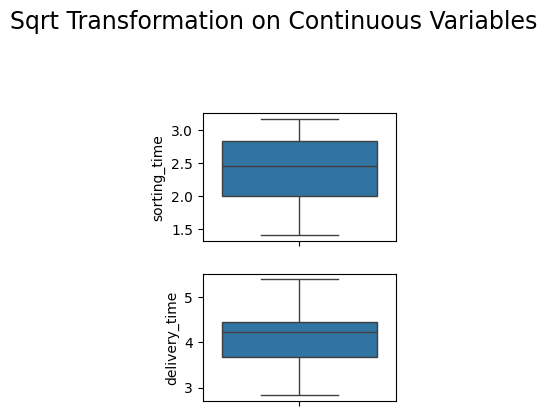

In [147]:
fig, ax=plt.subplots(2, figsize=(3,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(data.sorting_time), ax=ax[0])
sns.boxplot(np.sqrt(data.delivery_time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

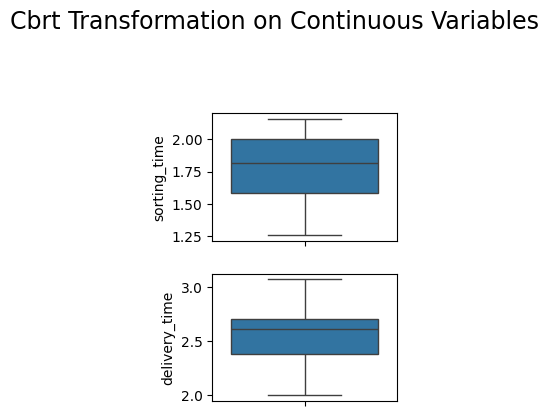

In [148]:
fig, ax=plt.subplots(2, figsize=(3,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(data.sorting_time), ax=ax[0])
sns.boxplot(np.cbrt(data.delivery_time), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [149]:
import statsmodels.api as sm

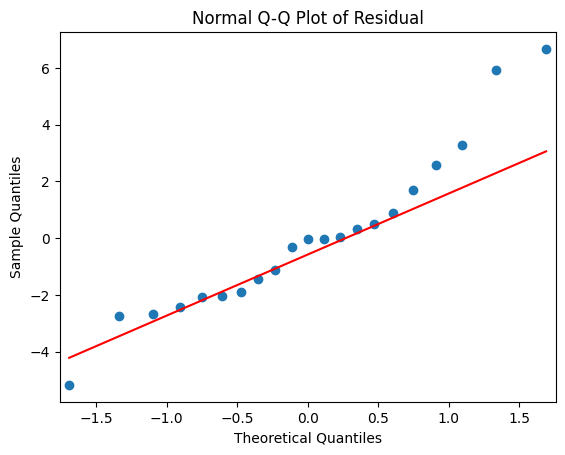

In [150]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [151]:
import numpy as np
list(np.where(model.resid>6))

[array([20])]

In [152]:

def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std()

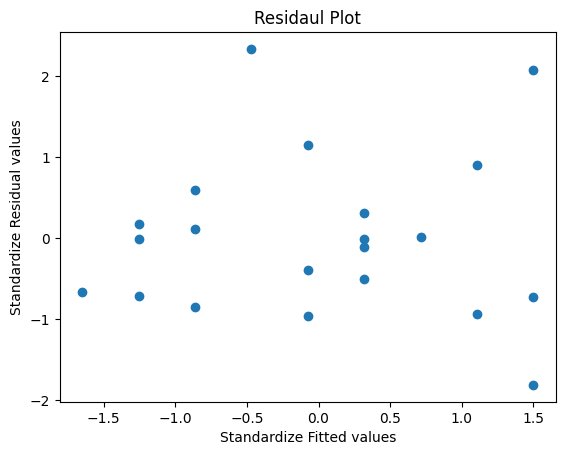

In [153]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

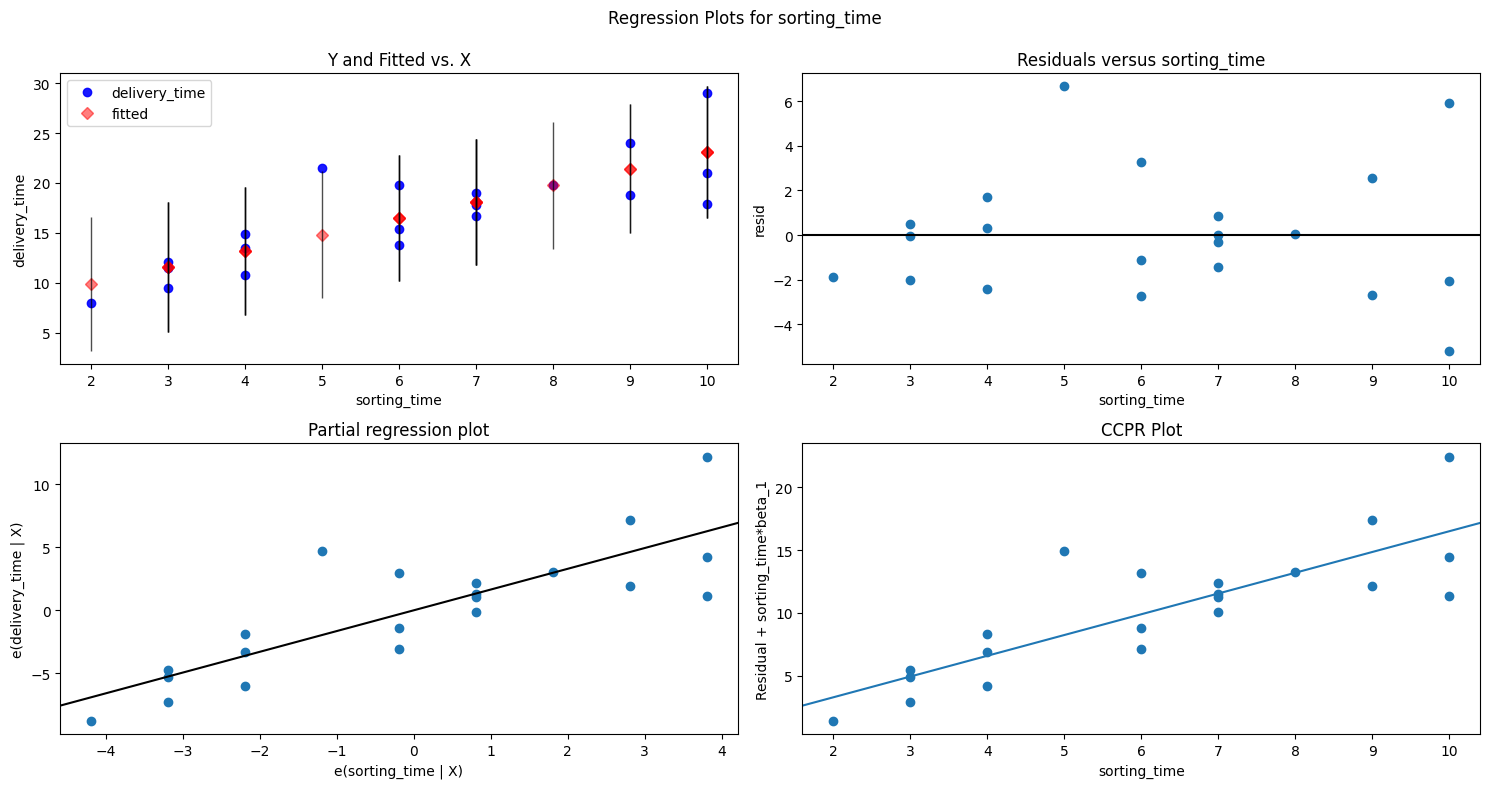

In [154]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sorting_time", fig=fig)
plt.show()

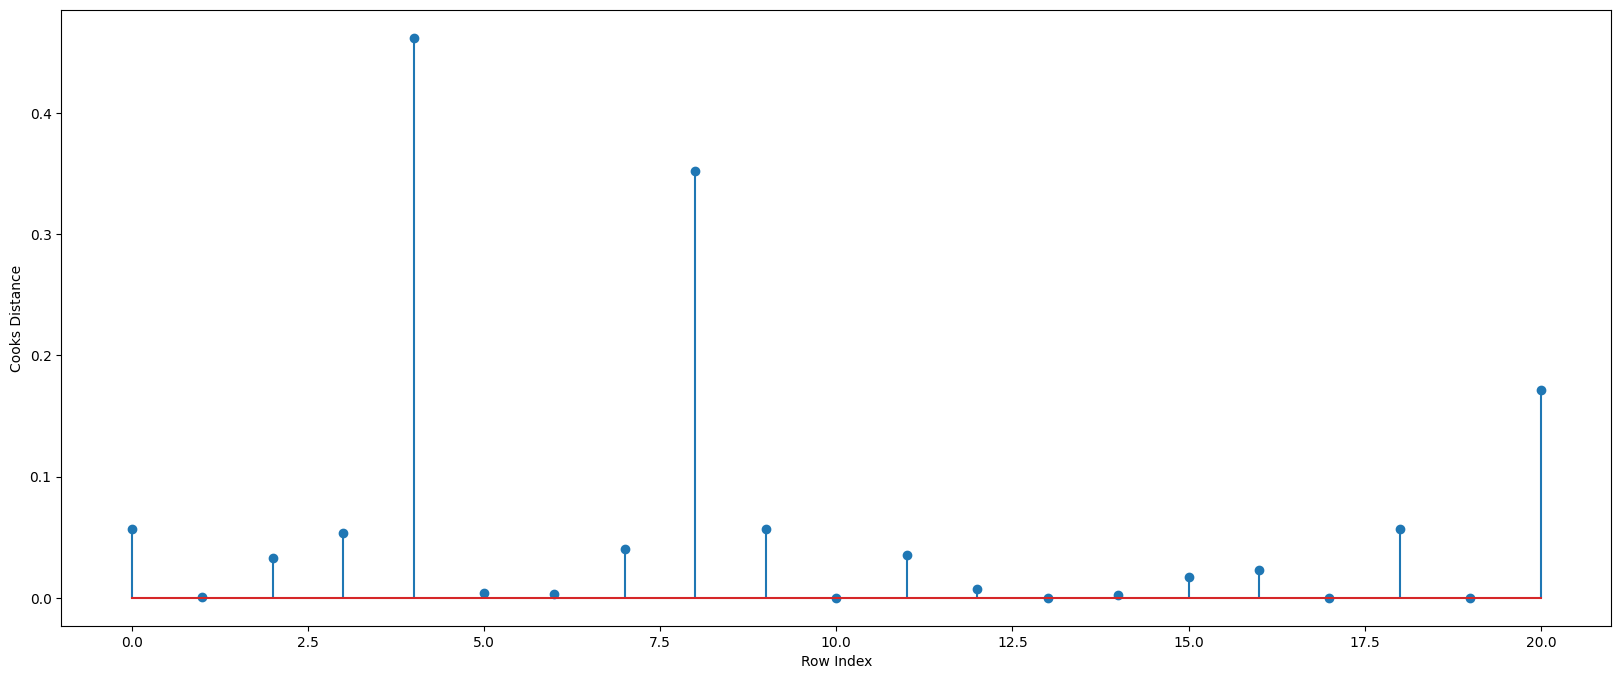

In [155]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

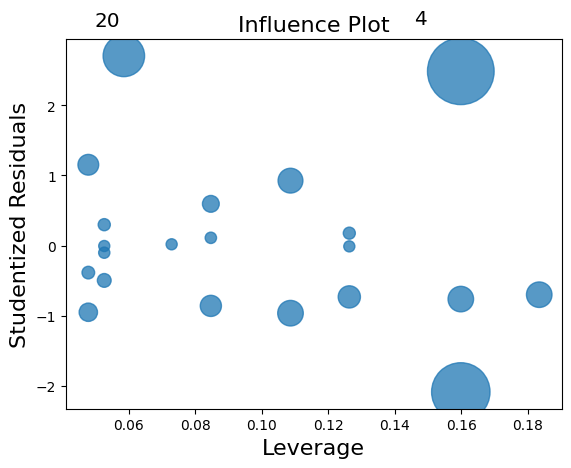

In [156]:

#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [157]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n


leverage_cutoff

0.42857142857142855

In [159]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])
data_pred = pd.DataFrame(newdata, columns = ['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10
